# UPC Lookup

Look up Meijer UPCs and return data.

In [1]:
import sys, os
import pandas as pd
sys.path.append(os.path.abspath("meijer"))

In [2]:
%load_ext autoreload
%autoreload 2

# Create ```Meijer``` instance.

In [3]:
from meijer import Meijer
# m = Meijer("<mperks-email>|<mperks-password>") # Password, not PIN.
# If no meijer_api_key is specified the class looks at the ```MEIJER_API_KEY``` environmental variable. 
m = Meijer()
self = m

In [4]:
m.get_upc?

# Call ```.get_upc()```

Defaults:

- upc='4125010200' [Meijer Vitamin D milk]
- storeID='226' [Rockford Meijer Store, chosen at random]


In [5]:
results = m.get_upc()
assert results["meta"]["totalResults"]==1

In [6]:
results["upcs"][0]

{'id': '226_UPCA_4125010200',
 'score': 99.66217,
 'storeId': 226,
 'upc': '4125010200',
 'upc_type': 'UPCA',
 'productId': '504293',
 'shortName': 'Meijer Vitamin D Whole Milk, 1 Gallon',
 'longName': 'MEIJER MILK WHOLE GAL',
 'description': 'You can find it on the doors of almost every refrigerator and in countless bowls of cereal across the world. With a smooth, creamy flavor in every sip and an added serving of calcium and Vitamin D, what’s not to love about Meijer Vitamin D Whole Milk? There’s a reason why it’s always at the top of your grocery list.',
 'uom': 'EA',
 'sellingSize': 'GALLON    ',
 'isRandomWeight': False,
 'images': [{'type': 'Front',
   'format': 'png',
   'size': 100,
   'isPrimary': True,
   'href': 'https://static.meijer.com/Media/000/41250/0004125010200_1_A1C1_0100.png'},
  {'type': 'Front',
   'format': 'png',
   'size': 200,
   'isPrimary': True,
   'href': 'https://static.meijer.com/Media/000/41250/0004125010200_1_A1C1_0200.png'},
  {'type': 'Front',
   'fo

In [9]:
upcs = m.get_upc(upc=41250102)
upcs

{'meta': {'totalResults': 0,
  'startingIndex': 0,
  'resultsReturned': 0,
  'sort': 'score desc,upc asc',
  'facets': [{'field': 'hw_claims',
    'displayName': 'Health and Wellness',
    'type': 'value',
    'values': []},
   {'field': 'ways_to_save',
    'displayName': 'Ways to Save',
    'type': 'value',
    'values': []}],
  'categories': [{'field': 'TierId',
    'displayName': 'Category',
    'values': []}]},
 'upcs': [],
 'linked': {}}

Get everything Meijer sells, empty query is a wildcard(?)

In [10]:
upcs = m.get_upc(upc="")
print(f"Found {upcs['meta']['totalResults']} upcs")

Found 83951 upcs


In [13]:
upcs.keys()

dict_keys(['meta', 'upcs', 'linked'])

In [16]:
len(upcs["upcs"])

30

# List all Stores

In [17]:
stores = m.stores()

# Find All Vitamin D Milk Prices

In [18]:
data = list()
for store in stores:
    upc_data = m.get_upc(storeID=store["unitid"])
    if len(upc_data["upcs"])>0:
        try:
            tmp = {
                "storeid": store["unitid"],
                "latitude": store["latitude"],
                "longitude": store["longitude"],
                "MeijerVitaminD": upc_data["upcs"][0]["priceValue"],
            } 
            data.append(tmp)
        except KeyError:
            pass

In [19]:
len(stores)

254

In [20]:
len(data)

250

# Convert Pricing Data to pandas DataFrame

In [21]:
df = pd.DataFrame(data)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

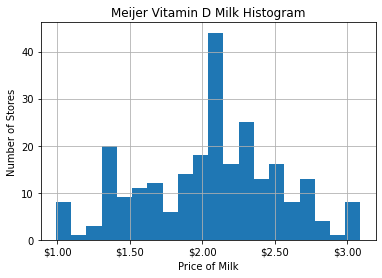

In [23]:
ax = df.MeijerVitaminD.hist(bins=20)
plt.title("Meijer Vitamin D Milk Histogram")
plt.xlabel("Price of Milk")
plt.ylabel("Number of Stores")
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter("${x:,.2f}"))

## Gas Prices

In [24]:
stores = m.stores()

In [31]:
data = list()
for store in stores:
    upc_data = m.get_upc(storeID=store["unitid"])
    if len(upc_data["upcs"])>0:
        tmp = {
            "storeid": store["unitid"],
            "latitude": store["latitude"],
            "longitude": store["longitude"],
            "MeijerVitaminD": upc_data["upcs"][0]["priceValue"],
        }
        if store["FuelPrices"] is not None:
            for fuel_price in store["FuelPrices"]:
                fuel_type = fuel_price["FuelType"].split("-")[0]
                fuel_price = fuel_price["FuelPrice"]
                tmp[fuel_type]=fuel_price
        data.append(tmp)
df = pd.DataFrame(data)

## Gas Pricing: Unleaded vs Midrange

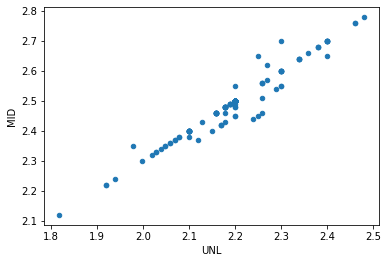

In [33]:
df.plot.scatter(x="UNL", y="MID")

## Price: Unleaded vs Whole Milk.

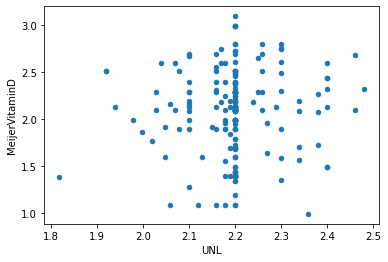

In [34]:
df.plot.scatter(x="UNL", y="MeijerVitaminD")

In [35]:
import datetime

In [36]:
datetime.datetime.now()

datetime.datetime(2020, 6, 24, 21, 41, 40, 65674)